In [8]:
import pandas as pd
import warnings
import numpy as np

warnings.filterwarnings('ignore',category=FutureWarning)

In [9]:
df = pd.read_csv(r"sales.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [10]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [11]:
df['Postal Code'].unique()

array([42420., 90036., 33311., 90032., 28027., 98103., 76106., 53711.,
       84084., 94109., 68025., 19140., 84057., 90049., 77095., 75080.,
       77041., 60540., 32935., 55122., 48185., 19901., 47150., 10024.,
       12180., 90004., 60610., 85234., 22153., 10009., 49201., 38109.,
       77070., 35601., 94122., 27707., 60623., 29203., 55901., 55407.,
       97206., 55106., 80013., 28205., 60462., 10035., 50322., 43229.,
       37620., 19805., 61701., 85023., 95661., 64055., 91104., 43055.,
       53132., 85254., 95123., 98105., 98115., 73034., 90045., 19134.,
       88220., 78207., 77036., 62521., 71203.,  6824., 75051., 92374.,
       45011.,  7090., 19120., 44312., 80219., 75220., 37064., 90604.,
       48601., 44256., 43017., 48227., 38401., 33614., 95051., 55044.,
       92037., 77506., 94513., 27514.,  7960., 45231., 94110., 90301.,
       33319., 80906.,  7109., 48180.,  8701., 22204., 80004.,  7601.,
       33710., 19143., 90805., 92345., 37130., 84041., 78745.,  1852.,
      

In [12]:
df['Postal Code'].dtype

dtype('float64')

In [13]:
df.loc[df['Postal Code'].isna(),['Country','City','State']]

,Country,City,State
2234,United States,Burlington,Vermont
5274,United States,Burlington,Vermont
8798,United States,Burlington,Vermont
9146,United States,Burlington,Vermont
9147,United States,Burlington,Vermont
9148,United States,Burlington,Vermont
9386,United States,Burlington,Vermont
9387,United States,Burlington,Vermont
9388,United States,Burlington,Vermont
9389,United States,Burlington,Vermont


In [14]:
df.fillna(5401,inplace=True)

In [15]:
df['Postal Code'] = df['Postal Code'].astype(int)

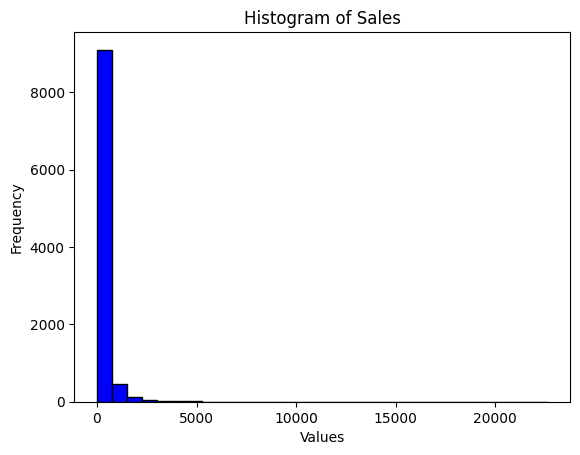

In [16]:
import matplotlib.pyplot as plt
plt.hist(df['Sales'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Sales')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()



In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [18]:
df['Order Date'].unique()

array(['08/11/2017', '12/06/2017', '11/10/2016', ..., '18/06/2015',
       '28/02/2018', '09/05/2016'], dtype=object)

In [19]:
df['Ship Date'].unique()

array(['11/11/2017', '16/06/2017', '18/10/2016', ..., '12/03/2015',
       '06/04/2018', '13/05/2016'], dtype=object)

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
8968,8969,CA-2015-166730,2015-12-30,2016-01-01,First Class,DD-13570,Dorothy Dickinson,Consumer,United States,Memphis,Tennessee,38109,South,OFF-ST-10002554,Office Supplies,Storage,Tennsco Industrial Shelving,39.128
5270,5271,CA-2018-144484,2018-09-11,2018-09-11,Same Day,CB-12025,Cassandra Brandow,Consumer,United States,San Francisco,California,94110,West,OFF-AP-10004487,Office Supplies,Appliances,Kensington 4 Outlet MasterPiece Compact Power ...,406.600
2327,2328,CA-2016-105102,2016-09-15,2016-09-19,Second Class,BM-11575,Brendan Murry,Corporate,United States,New York City,New York,10035,East,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,12.960
3525,3526,CA-2018-148922,2018-12-10,2018-12-15,Second Class,SU-20665,Stephanie Ulpright,Home Office,United States,Jackson,Mississippi,39212,South,TEC-AC-10001838,Technology,Accessories,Razer Tiamat Over Ear 7.1 Surround Sound PC Ga...,599.970
8290,8291,CA-2015-156244,2015-08-12,2015-08-16,Standard Class,DH-13675,Duane Huffman,Home Office,United States,Miami,Florida,33180,South,OFF-SU-10000432,Office Supplies,Supplies,Acco Side-Punched Conventional Columnar Pads,5.552
3953,3954,CA-2018-152961,2018-01-15,2018-01-19,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Quincy,Massachusetts,2169,East,OFF-PA-10004675,Office Supplies,Paper,Telephone Message Books with Fax/Mobile Sectio...,12.700
3669,3670,CA-2015-129364,2015-12-08,2015-12-13,Standard Class,TB-21250,Tim Brockman,Consumer,United States,Salem,Oregon,97301,West,OFF-LA-10004409,Office Supplies,Labels,Avery 492,11.520
4456,4457,US-2016-146745,2016-09-03,2016-09-08,Standard Class,AS-10630,Ann Steele,Home Office,United States,San Francisco,California,94110,West,OFF-BI-10003274,Office Supplies,Binders,"Avery Durable Slant Ring Binders, No Labels",6.368
4642,4643,CA-2018-130141,2018-10-22,2018-10-24,Second Class,HA-14905,Helen Abelman,Consumer,United States,Fort Collins,Colorado,80525,West,FUR-CH-10000749,Furniture,Chairs,Office Star - Ergonomic Mid Back Chair with 2-...,579.136
9336,9337,CA-2018-130715,2018-09-16,2018-09-20,Standard Class,CY-12745,Craig Yedwab,Corporate,United States,San Francisco,California,94110,West,OFF-FA-10000621,Office Supplies,Fasteners,"OIC Colored Binder Clips, Assorted Sizes",17.900


In [21]:
df['Order day'] = df['Order Date'].dt.day
df['Order month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year

df['Ship day'] = df['Ship Date'].dt.day
df['Ship month'] = df['Ship Date'].dt.month
df['Ship Year'] = df['Ship Date'].dt.year
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Order day,Order month,Order Year,Ship day,Ship month,Ship Year
5158,5159,CA-2018-163006,2018-06-30,2018-07-04,Second Class,GH-14410,Gary Hansen,Home Office,United States,Chicago,...,Furniture,Furnishings,"Seth Thomas 13 1/2"" Wall Clock",14.224,30,6,2018,4,7,2018
8031,8032,CA-2017-158806,2017-01-07,2017-01-11,Standard Class,NM-18520,Neoma Murray,Consumer,United States,Amarillo,...,Office Supplies,Paper,Xerox 212,25.920,7,1,2017,11,1,2017
6390,6391,CA-2016-147529,2016-02-07,2016-02-11,Standard Class,DK-12835,Damala Kotsonis,Corporate,United States,Springfield,...,Office Supplies,Paper,Xerox 1957,12.960,7,2,2016,11,2,2016
7205,7206,CA-2018-137414,2018-10-02,2018-10-06,Standard Class,CM-12115,Chad McGuire,Consumer,United States,San Francisco,...,Furniture,Furnishings,Dax Clear Box Frame,17.460,2,10,2018,6,10,2018
1095,1096,CA-2018-160423,2018-01-21,2018-01-26,Standard Class,PS-19045,Penelope Sewall,Home Office,United States,Charlotte,...,Office Supplies,Storage,"Fellowes Mobile File Cart, Black",348.208,21,1,2018,26,1,2018
8067,8068,US-2016-160563,2016-10-20,2016-10-24,Standard Class,NS-18640,Noel Staavos,Corporate,United States,San Francisco,...,Technology,Accessories,Logitech G602 Wireless Gaming Mouse,239.970,20,10,2016,24,10,2016
9307,9308,CA-2015-128237,2015-03-25,2015-03-30,Standard Class,CA-12265,Christina Anderson,Consumer,United States,San Francisco,...,Office Supplies,Art,"Eberhard Faber 3 1/2"" Golf Pencils",14.880,25,3,2015,30,3,2015
8412,8413,CA-2018-132290,2018-03-10,2018-03-14,Standard Class,MD-17350,Maribeth Dona,Consumer,United States,Dallas,...,Furniture,Tables,"Bevis Traditional Conference Table Top, Plinth...",933.408,10,3,2018,14,3,2018
7241,7242,CA-2018-136651,2018-04-23,2018-04-25,Second Class,JF-15355,Jay Fein,Consumer,United States,Pasadena,...,Office Supplies,Binders,GBC Durable Plastic Covers,92.880,23,4,2018,25,4,2018
3793,3794,CA-2016-163762,2016-11-27,2016-12-01,Standard Class,JE-15475,Jeremy Ellison,Consumer,United States,New York City,...,Office Supplies,Art,Peel-Off China Markers,29.790,27,11,2016,1,12,2016


In [22]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order day', 'Order month', 'Order Year',
       'Ship day', 'Ship month', 'Ship Year'],
      dtype='object')

In [23]:
new_df = df.drop(['Row ID', 'Order ID', 'Order Date', 'Ship Date','Customer ID', 'Customer Name','Country', 'City','Product ID', 'State'],axis='columns')

In [24]:
new_df.sample(10)

,Ship Mode,Segment,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Order day,Order month,Order Year,Ship day,Ship month,Ship Year
8377,Standard Class,Corporate,77095,Central,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",64.784,12,11,2016,18,11,2016
6574,Standard Class,Corporate,7060,East,Technology,Machines,Konica Minolta magicolor 1690MF Multifunction ...,319.920,25,11,2017,30,11,2017
3509,Standard Class,Consumer,75023,Central,Office Supplies,Paper,"Array Parchment Paper, Assorted Colors",11.648,20,6,2015,24,6,2015
9007,Same Day,Corporate,53209,Central,Office Supplies,Labels,Avery 487,7.380,18,11,2018,18,11,2018
2870,Standard Class,Corporate,85705,West,Office Supplies,Paper,Xerox 1951,74.352,22,3,2015,26,3,2015
2037,Standard Class,Home Office,59715,West,Office Supplies,Labels,Avery 500,14.620,23,1,2016,27,1,2016
6422,Standard Class,Corporate,84020,West,Technology,Accessories,Memorex Micro Travel Drive 16 GB,111.930,26,7,2015,1,8,2015
6793,Standard Class,Corporate,60610,Central,Office Supplies,Storage,"Neat Ideas Personal Hanging Folder Files, Black",21.488,16,11,2016,20,11,2016
3188,Second Class,Corporate,95695,West,Office Supplies,Labels,Avery 510,3.750,20,10,2018,22,10,2018
6183,Standard Class,Consumer,29203,South,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",887.840,21,9,2016,26,9,2016


In [25]:
new_df['Sales'] = np.log(new_df['Sales'])

In [26]:
label_encoders = ['Ship Mode','Segment','Region','Category','Sub-Category','Product Name','Sales']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for cols in label_encoders:
    new_df[cols] = le.fit_transform(new_df[cols])

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Ship Mode     9800 non-null   int32
 1   Segment       9800 non-null   int32
 2   Postal Code   9800 non-null   int32
 3   Region        9800 non-null   int32
 4   Category      9800 non-null   int32
 5   Sub-Category  9800 non-null   int32
 6   Product Name  9800 non-null   int32
 7   Sales         9800 non-null   int64
 8   Order day     9800 non-null   int32
 9   Order month   9800 non-null   int32
 10  Order Year    9800 non-null   int32
 11  Ship day      9800 non-null   int32
 12  Ship month    9800 non-null   int32
 13  Ship Year     9800 non-null   int32
dtypes: int32(13), int64(1)
memory usage: 574.3 KB


In [28]:
x=new_df.drop('Sales',axis='columns')
y=new_df['Sales']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=10)

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
model = RandomForestRegressor(n_estimators=1000)

In [32]:
model.fit(x_train,y_train)


RandomForestRegressor(n_estimators=1000)

In [33]:
model.score(x_test,y_test)

0.6747799801037213